In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Conv2D, MaxPooling2D,Flatten
import numpy as np
import cv2

In [0]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import random

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
!unzip /content/set.zip

Archive:  /content/set.zip
   creating: Set/
   creating: Set/LuizSuarez/
  inflating: Set/LuizSuarez/LuisSuarez408.jpg  
  inflating: Set/LuizSuarez/LuisSuarez235.jpg  
  inflating: Set/LuizSuarez/LuisSuarez380.jpg  
  inflating: Set/LuizSuarez/LuisSuarez119.jpg  
  inflating: Set/LuizSuarez/LuisSuarez39.jpg  
  inflating: Set/LuizSuarez/LuisSuarez603.jpg  
  inflating: Set/LuizSuarez/LuisSuarez240.jpg  
  inflating: Set/LuizSuarez/LuisSuarez581.jpg  
  inflating: Set/LuizSuarez/LuisSuarez346.jpg  
  inflating: Set/LuizSuarez/LuisSuarez550.jpg  
  inflating: Set/LuizSuarez/LuisSuarez395.jpg  
  inflating: Set/LuizSuarez/LuisSuarez599.jpg  
  inflating: Set/LuizSuarez/LuisSuarez338.jpg  
  inflating: Set/LuizSuarez/LuisSuarez21.jpg  
  inflating: Set/LuizSuarez/LuisSuarez411.jpg  
  inflating: Set/LuizSuarez/LuisSuarez213.jpg  
  inflating: Set/LuizSuarez/LuisSuarez350.jpg  
  inflating: Set/LuizSuarez/LuisSuarez158.jpg  
  inflating: Set/LuizSuarez/LuisSuarez356.jpg  
  inflating: Set

In [0]:
base_path = '/content/Set'

In [0]:
classes = ['DalaiLama','ArseneWenger','GeneliaDsouza', 'LuizSuarez', 'SergioAguero']
Img_size = 150
training_data = []

In [0]:
base_dir = "/content/Set"

In [9]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))


DalaiLama: 424 Images
ArseneWenger: 580 Images
GeneliaDsouza: 561 Images
LuizSuarez: 614 Images
SergioAguero: 530 Images


In [10]:
round(len(images)*0.8)

424

In [0]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')


In [0]:
total_tr = 1500
total_val = 700
BATCH_SIZE = 100
IMG_SHAPE = 150

In [0]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout
  plt.show()

In [16]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2167 images belonging to 5 classes.


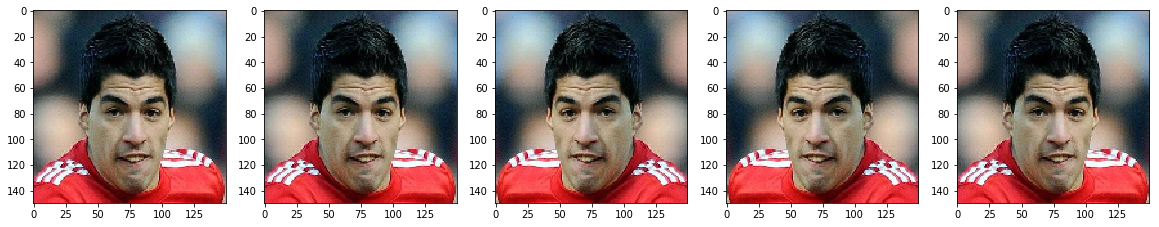

In [17]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [18]:
image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    zoom_range=0.5,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
)
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='sparse')

Found 2167 images belonging to 5 classes.


In [19]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE,IMG_SHAPE),
                                                 class_mode='sparse')

Found 542 images belonging to 5 classes.


In [0]:
from tensorflow.keras.applications import MobileNetV2

In [21]:
base_model = MobileNetV2(input_shape=(Img_size,Img_size, 3), include_top=False, weights='imagenet')
base_model.trainable = False

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 2s 0us/step


In [22]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 151, 151, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
model = Sequential()

In [76]:
#modelmain.add(MaxPooling2D(2,2))

#modelmain.add(Conv2D(64,(3,3), activation='relu', input_shape=(150,150,3)))
#modelmain.add(MaxPooling2D(2,2))

#modelmain.add(Conv2D(64,(3,3), activation='relu'))
#modelmain.add(MaxPooling2D(2,2))

#modelmain.add(Conv2D(128,(3,3), activation='relu'))
#modelmain.add(MaxPooling2D(2,2))

#modelmain.add(Conv2D(128,(3,3), activation='relu'))
#modelmain.add(MaxPooling2D(2,2))

#modelmain.add(Dropout(0.5))
#modelmain.add(Flatten())
#modemain.add(Dense(512, activation='relu'))
#modelmain.statadd(Dense(5, activation='softmax'))



NameError: ignored

In [0]:
model.add(base_model)


model.add(MaxPooling2D(pool_size=(3,3)))  #MaxPooling is done to neuron mismatch

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(5, activation='softmax'))

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 1280)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                81984     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 645       
Total params: 2,348,933
Trainable params: 90,949
Non-trainable params: 2,257,984
_______________________________________

In [48]:
epochs=8
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(BATCH_SIZE)))
)

Epoch 1/8
22/22 [==============================] - 19s 884ms/step - loss: 1.3885 - acc: 0.4495 - val_loss: 1.1269 - val_acc: 0.5314
Epoch 2/8
22/22 [==============================] - 16s 738ms/step - loss: 0.8014 - acc: 0.6844 - val_loss: 0.9148 - val_acc: 0.6255
Epoch 3/8
22/22 [==============================] - 16s 741ms/step - loss: 0.6903 - acc: 0.7328 - val_loss: 0.8530 - val_acc: 0.6697
Epoch 4/8
22/22 [==============================] - 16s 744ms/step - loss: 0.6512 - acc: 0.7513 - val_loss: 0.6580 - val_acc: 0.7325
Epoch 5/8
22/22 [==============================] - 16s 746ms/step - loss: 0.5974 - acc: 0.7674 - val_loss: 0.7346 - val_acc: 0.7196
Epoch 6/8
22/22 [==============================] - 16s 738ms/step - loss: 0.6165 - acc: 0.7757 - val_loss: 0.6607 - val_acc: 0.7399
Epoch 7/8
22/22 [==============================] - 16s 741ms/step - loss: 0.5585 - acc: 0.7826 - val_loss: 0.9343 - val_acc: 0.6716
Epoch 8/8
22/22 [==============================] - 17s 750ms/step - loss: 0.

In [0]:
model.save('/content/drive/My Drive/Hackathon-Alphacode/Celeb_model_new6.h5')

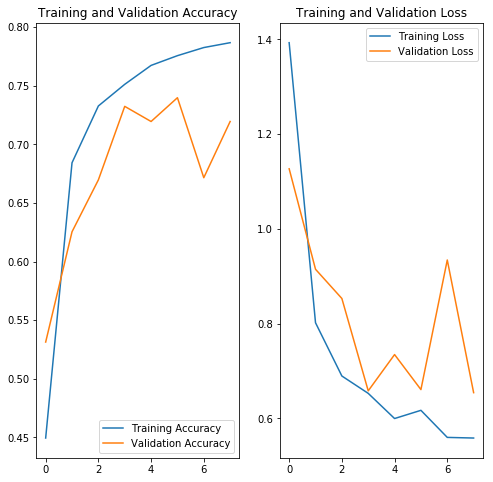

In [50]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()